## Приоритизация гипотез

### Шаг 1. Загрузка данных и подготовка их к анализу

In [1]:
import pandas as pd # импорт библиотеки pandas
import numpy as np # импорт библиотеки numpy
from datetime import datetime, timedelta # импорт библиотеки datetime
from matplotlib import pyplot as plt # импорт библиотеки matplotlib
import scipy.stats as stats # импорт библиотеки scipy
import seaborn as sns # импорт библиотеки seaborn
import warnings # импорт библиотеки warnings
warnings.filterwarnings('ignore') # фильтр предупреждений


In [2]:
# чтение файла с данными и сохранение в hypothesis 
try:
    hypothesis = pd.read_csv('/datasets/hypothesis.csv')
except FileNotFoundError:
    print('файл или директория не существует!') 

In [3]:
dict_df = {'Гипотезы': hypothesis} 

In [4]:
# функция получения информации
def get_info(name, df): 
    
    print('Первые 5 строк таблицы', name)
    display(df.head())
    print()
    print('Сводная информация о таблице', name)
    print()
    df.info()
    print()
    print('Описательная статистика таблицы', name)
    display(df.describe())
    print()
    print('Дубликатов в таблице', name, ':', df.duplicated().sum())
    print()

In [5]:
pd.set_option('display.max_columns', None)
pd.options.display.max_colwidth = 150 

In [6]:
# получаем информацию по таблицам
for dfd in dict_df:
    get_info(dfd, dict_df[dfd])

Первые 5 строк таблицы Гипотезы


,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1



Сводная информация о таблице Гипотезы

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
Hypothesis    9 non-null object
Reach         9 non-null int64
Impact        9 non-null int64
Confidence    9 non-null int64
Efforts       9 non-null int64
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes

Описательная статистика таблицы Гипотезы


,Reach,Impact,Confidence,Efforts
count,9.000000,9.000000,9.000000,9.000000
mean,4.777778,4.777778,5.555556,4.888889
std,3.153481,3.192874,3.045944,2.803767
min,1.000000,1.000000,1.000000,1.000000
25%,3.000000,3.000000,3.000000,3.000000
50%,3.000000,3.000000,7.000000,5.000000
75%,8.000000,7.000000,8.000000,6.000000
max,10.000000,10.000000,9.000000,10.000000



Дубликатов в таблице Гипотезы : 0



In [7]:
# перевод названия столбцов к змеиному регистру
for dfd in dict_df:
    dict_df[dfd].columns = dict_df[dfd].columns.str.lower()

### Шаг 2. Применение фреймворка ICE для приоритизации гипотез

In [8]:
hypothesis['ICE'] = round(hypothesis['impact']*hypothesis['confidence']/hypothesis['efforts'], 1) # расчитываем ICE
hypothesis[['hypothesis', 'ICE']].sort_values(by = 'ICE', ascending=False) # выводим на экран в порядке убывания

,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.2
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.1
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.0


### Шаг 3. Применение фреймворка RICE для приоритизации гипотез

In [9]:
hypothesis['RICE'] = hypothesis['reach']*hypothesis['impact']*hypothesis['confidence']/hypothesis['efforts'] # расчитываем RICE
hypothesis[['hypothesis', 'RICE', 'reach']].sort_values(by = 'RICE', ascending=False) # выводим на экран в порядке убывания

,hypothesis,RICE,reach
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0,8
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0,5
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2,1
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0,8
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0,2
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0,3
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0,3


In [10]:
hypothesis[['hypothesis','ICE', 'RICE']].sort_values(by = 'RICE', ascending=False).style.background_gradient(sns.light_palette("red", as_cmap=True))

,hypothesis,ICE,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.2,112
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7,56
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.3,40
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8,40
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2,16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.1,9
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,4
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.3,4
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1,3


### Шаг 4. Вывод

 При применении RICE вместо ICE гипотеза добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок с третьего места перешла на первое из-за охвата пользователей 10, а гипотеза запустить акцию, дающую скидку на товар в день рождения с первого места перешла на 5 из-за охвата пользователей 1. Чем больше охват пользователей и тем выше приоритет гипотезы.

## Анализ A/B-теста

Задачи:
* Постройте график кумулятивной выручки по группам. Сделайте выводы и предположения.
* Постройте график кумулятивного среднего чека по группам. Сделайте выводы и предположения.
* Постройте график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения.
* Постройте график кумулятивной конверсии по группам. Сделайте выводы и предположения.
* Постройте график относительного изменения кумулятивной конверсии группы B к группе A. Сделайте выводы и предположения.
* Постройте точечный график количества заказов по пользователям. Сделайте выводы и предположения.
* Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей.
* Постройте точечный график стоимостей заказов. Сделайте выводы и предположения.
* Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.
* Посчитайте статистическую значимость различий в конверсии между группами по «сырым» данным. Сделайте выводы и предположения.
* Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения.
* Посчитайте статистическую значимость различий в конверсии между группами по «очищенным» данным. Сделайте выводы и предположения.
* Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения.
* Примите решение по результатам теста и объясните его. Варианты решений: 1. Остановить тест, зафиксировать победу одной из групп. 2. Остановить тест, зафиксировать отсутствие различий между группами. 3. Продолжить тест.

Исходные данные:
/datasets/orders.csv   
* transactionId — идентификатор заказа;
* visitorId — идентификатор пользователя, совершившего заказ;
* date — дата, когда был совершён заказ;
* revenue — выручка заказа;
* group — группа A/B-теста, в которую попал заказ.

/datasets/visitors.csv
* date — дата;
* group — группа A/B-теста;
* visitors — количество пользователей в указанную дату в указанной группе A/B-теста

### Шаг 5. Загрузка данных и подготовка их к анализу

In [11]:
# чтение файлов с данными и сохранение в orders и visitors 
try:
    orders = pd.read_csv('/datasets/orders.csv')
    visitors = pd.read_csv('/datasets/visitors.csv')
    
except FileNotFoundError:
    print('файл или директория не существует!') 

In [12]:
dict_df = {'Заказы': orders, 'Визиты': visitors} 

In [13]:
# получаем информацию по таблицам
for dfd in dict_df:
    get_info(dfd, dict_df[dfd])

Первые 5 строк таблицы Заказы


,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B



Сводная информация о таблице Заказы

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
transactionId    1197 non-null int64
visitorId        1197 non-null int64
date             1197 non-null object
revenue          1197 non-null int64
group            1197 non-null object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB

Описательная статистика таблицы Заказы


,transactionId,visitorId,revenue
count,1.197000e+03,1.197000e+03,1.197000e+03
mean,2.155621e+09,2.165960e+09,8.348006e+03
std,1.229085e+09,1.236014e+09,3.919113e+04
min,1.062393e+06,5.114589e+06,5.000000e+01
25%,1.166776e+09,1.111826e+09,1.220000e+03
50%,2.145194e+09,2.217985e+09,2.978000e+03
75%,3.237740e+09,3.177606e+09,8.290000e+03
max,4.293856e+09,4.283872e+09,1.294500e+06



Дубликатов в таблице Заказы : 0

Первые 5 строк таблицы Визиты


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756



Сводная информация о таблице Визиты

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
date        62 non-null object
group       62 non-null object
visitors    62 non-null int64
dtypes: int64(1), object(2)
memory usage: 1.6+ KB

Описательная статистика таблицы Визиты


,visitors
count,62.000000
mean,607.290323
std,114.400560
min,361.000000
25%,534.000000
50%,624.500000
75%,710.500000
max,770.000000



Дубликатов в таблице Визиты : 0



In [14]:
# преобразование данных о времени
orders['date'] = pd.to_datetime(orders['date'])
visitors['date'] = pd.to_datetime(visitors['date'])

In [15]:
# поиск заказов пользователей попавших в обе группы
ordersA = orders[orders['group'] == 'A']['visitorId'] 
ordersB = orders[orders['group'] == 'B']['visitorId'] 
ordersAB = orders.query('visitorId in @ordersA & visitorId in @ordersB') 
print(ordersAB.shape) 
ordersAB.sort_values(by = 'visitorId').head(5) 

(181, 5)


,transactionId,visitorId,date,revenue,group
703,4293855558,8300375,2019-08-07,1790,A
71,3679129301,8300375,2019-08-01,10510,B
823,2971973105,199603092,2019-08-27,2790,A
246,437656952,199603092,2019-08-02,3488,B
26,2223239646,199603092,2019-08-15,3488,A


Всего 181 заказов которые совершили пользователи попавшие в обе группы теста, удалим их.

In [16]:
orders = orders.query('visitorId not in @ordersAB') 

### Шаг 6. График кумулятивной выручки по группам

In [17]:
# делим visitors на группы A и B
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]

# делим orders на группы A и B, группируем по дате
ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
# объединяем visitorsADaily, visitorsBDaily, ordersADaily, ordersBDaily
data = visitorsADaily.merge(
    visitorsBDaily, left_on='date', right_on='date', how='left',suffixes=['A', 'B']
).merge(
    ordersADaily, left_on='date', right_on='date', how='left'
).merge(
    ordersBDaily, left_on='date', right_on='date', how='left',suffixes=['A', 'B'])  

#  применим lambda-функцию к data
dataCummulative = data.apply(
    lambda x: data[data['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsA': 'sum', 'visitorsB': 'sum', 'transactionIdA': 'sum', 'revenueA': 'sum', 'transactionIdB': 'sum', 'revenueB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])

# объединяем data и dataCummulative
data = data.merge(dataCummulative,  left_on='date', right_on='date', how='left',suffixes=['Daily', 'Cummulative'])
data.head(5) # выводим на экран первые 5 строк data

,date,visitorsADaily,visitorsBDaily,transactionIdADaily,revenueADaily,transactionIdBDaily,revenueBDaily,visitorsACummulative,visitorsBCummulative,transactionIdACummulative,revenueACummulative,transactionIdBCummulative,revenueBCummulative
0,2019-08-01,719,713,24,148579,21,101217,719,713,24,148579,21,101217
1,2019-08-02,619,581,20,93822,24,165531,1338,1294,44,242401,45,266748
2,2019-08-03,507,509,24,112473,16,114248,1845,1803,68,354874,61,380996
3,2019-08-04,717,770,16,70825,17,108571,2562,2573,84,425699,78,489567
4,2019-08-05,756,707,25,124218,23,92428,3318,3280,109,549917,101,581995


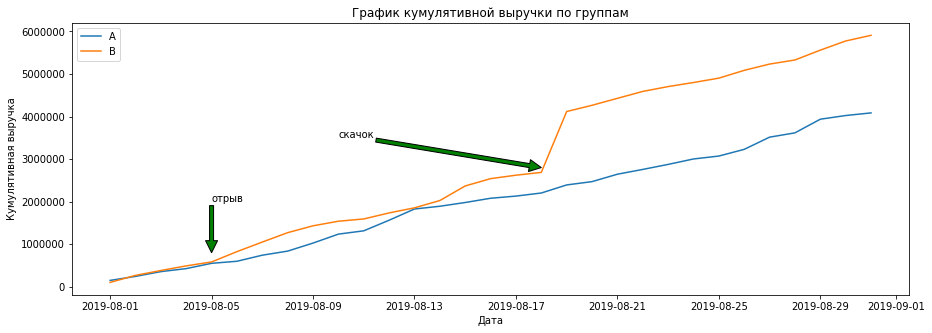

In [18]:
plt.figure(figsize=(15, 5)) # задаём размер графика 
plt.plot(data['date'], data['revenueACummulative'], label = 'A') # строим график A 
plt.plot(data['date'], data['revenueBCummulative'], label = 'B') # строим график B
plt.ylabel('Кумулятивная выручка') # подписываем ось y
plt.xlabel('Дата') # подписываем ось x
plt.title('График кумулятивной выручки по группам') # Подписываем заголовок 
plt.legend() # помещаем легенду 

plt.annotate('скачок', xy=('2019-08-18', 2800000), xytext=('2019-08-10', 3500000),
            arrowprops=dict(facecolor='g'))
plt.annotate('отрыв', xy=('2019-08-05', 800000), xytext=('2019-08-05', 2000000),
            arrowprops=dict(facecolor='g'))

plt.show() # показываем график

Выручка увеличивается в течении всего теста, в группе B наблюдается резкий рост. Возможно либо резки рост числа заказов, либо появление дорогих заказов.

### Шаг 7. График кумулятивного среднего чека по группам

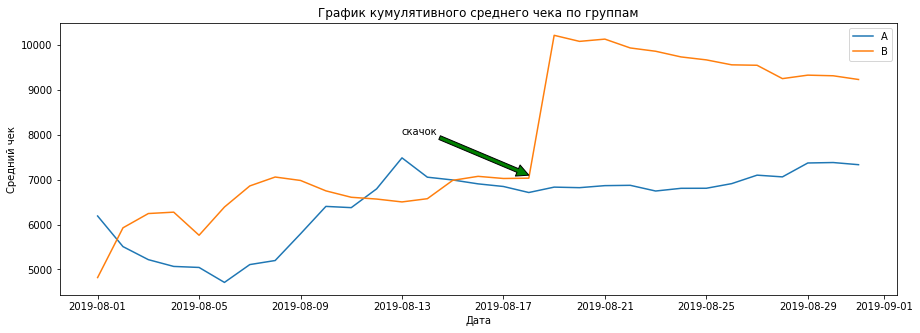

In [19]:
plt.figure(figsize=(15, 5)) # задаём размер графика 
plt.plot(data['date'], data['revenueACummulative']/data['transactionIdACummulative'], label = 'A') # строим график A
plt.plot(data['date'], data['revenueBCummulative']/data['transactionIdBCummulative'], label = 'B') # строим график B
plt.ylabel('Средний чек') # подписываем ось y
plt.xlabel('Дата') # подписываем ось x
plt.title('График кумулятивного среднего чека по группам') # Подписываем заголовок
plt.legend() # помещаем легенду
plt.annotate('скачок', xy=('2019-08-18', 7100), xytext=('2019-08-13', 8000),
            arrowprops=dict(facecolor='g'))
plt.show() # показываем график

Резкий рост среднего чека в группе B подтверждает появление дорогих заказов.

### Шаг 8. График относительного изменения кумулятивного среднего чека группы B к группе A

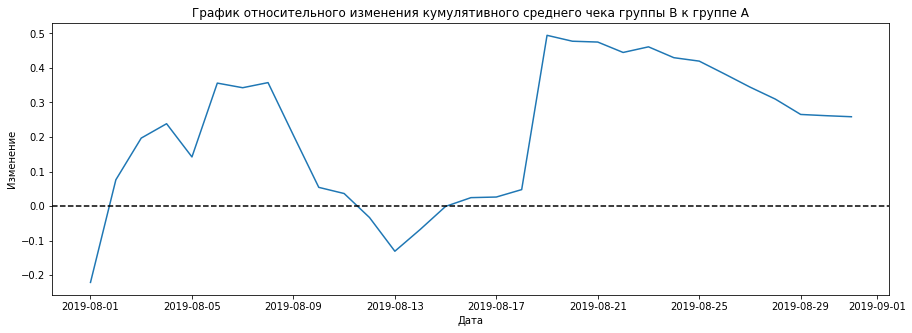

In [20]:
plt.figure(figsize=(15, 5)) # задаём размер графика
plt.plot(data['date'], (data['revenueBCummulative']/data['transactionIdBCummulative'])/(data['revenueACummulative']/data['transactionIdACummulative'])-1) # строим график
plt.ylabel('Изменение') # подписываем ось y
plt.xlabel('Дата') # подписываем ось x
plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A') # Подписываем заголовок
plt.axhline(y=0, color='black', linestyle='--') # добавляем ось X
plt.show() # показываем график

На графике относительного изменения кумулятивного среднего чека группы B к группе A хорошо видны выбросы в начале месяца и середине.

### Шаг 9. График кумулятивной конверсии по группам

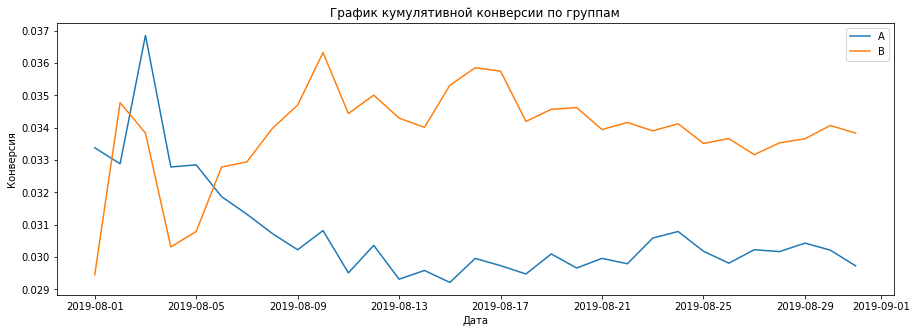

In [21]:
plt.figure(figsize=(15, 5)) # задаём размер графика
plt.plot(data['date'], data['transactionIdACummulative']/data['visitorsACummulative'], label = 'A') # строим график A
plt.plot(data['date'], data['transactionIdBCummulative']/data['visitorsBCummulative'], label = 'B') # строим график B
plt.ylabel('Конверсия') # подписываем ось y
plt.xlabel('Дата') # подписываем ось x
plt.title('График кумулятивной конверсии по группам') # Подписываем заголовок
plt.legend()
plt.show() # показываем график

На графике кумулятивной конверсии по группам видно что группа B после колебаний в начале месяца вырвалась вперёд.

### Шаг 10. График относительного изменения кумулятивной конверсии группы B к группе A

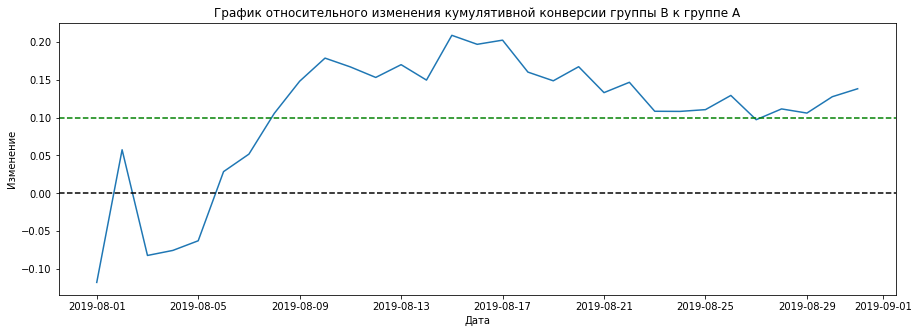

In [22]:
plt.figure(figsize=(15, 5)) # задаём размер графика
plt.plot(data['date'], (data['transactionIdBCummulative']/data['visitorsBCummulative'])/(data['transactionIdACummulative']/data['visitorsACummulative'])-1) # строим график
plt.ylabel('Изменение') # подписываем ось y
plt.xlabel('Дата') # подписываем ось x
plt.title('График относительного изменения кумулятивной конверсии группы B к группе A') # Подписываем заголовок
plt.axhline(y=0, color='black', linestyle='--') # добавляем ось X 
plt.axhline(y=0.10, color='green', linestyle='--') # добавляем ось X 
plt.show() # показываем график

Относительное изменение конверсии B относительно A зафткстровалась выше 10%.

### Шаг 11. Точечный график количества заказов по пользователям

In [23]:
# группируем orders по пользователям
ordersByUsers = (
    orders.groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)

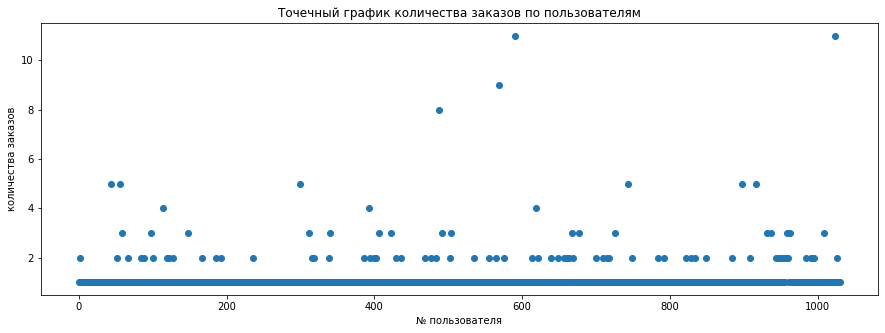

In [24]:
x_values = pd.Series(range(0,len(ordersByUsers))) # задаём № пользователя
plt.figure(figsize=(15, 5)) # задаём размер графика
plt.scatter(x_values, ordersByUsers['transactionId']) # строим точечныйт график
plt.ylabel('количества заказов') # подписываем ось y
plt.xlabel('№ пользователя') # подписываем ось x
plt.title('Точечный график количества заказов по пользователям') # Подписываем заголовок
plt.show() # показываем график

На точечном графике наблюдаются аномальные выбросы заказов, но визуально границу определить сложно, для определения границ аномальных заказов посчитаем перцентели.

### Шаг 12. 95-й и 99-й перцентили количества заказов на пользователя

In [25]:
print(np.percentile(ordersByUsers['transactionId'], [95, 99])) # выводим на экран перцентили 95 и 99

[2. 4.]


Всех пользователей у кого больше 2 заказов будем считать аномальными.

### Шаг 13. Точечный график стоимостей заказов

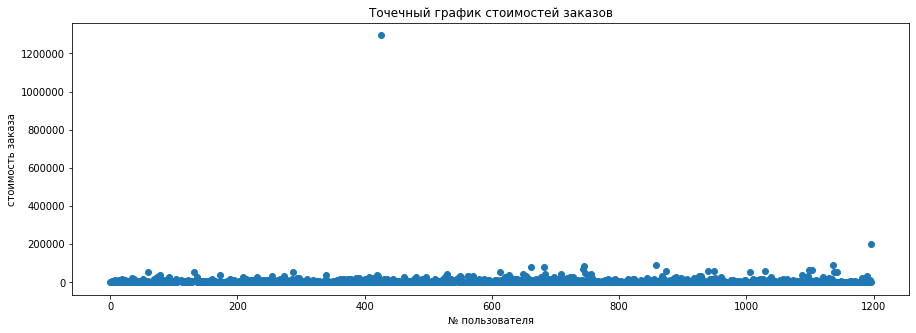

In [26]:
x_values = pd.Series(range(0,len(orders))) # задаём № пользователя
plt.figure(figsize=(15, 5)) # задаём размер графика
plt.scatter(x_values, orders['revenue']) # строим точечныйт график
plt.ylabel('стоимость заказа') # подписываем ось y
plt.xlabel('№ пользователя') # подписываем ось x
plt.title('Точечный график стоимостей заказов') # Подписываем заголовок
plt.show() # показываем график

На точечном графике наблюдаются аномальные выбросы стоимости заказов, но визуально границу определить сложно, для определения границ аномальной стоимости заказов посчитаем перцентели.

### Шаг 14. 95-й и 99-й перцентили стоимостей заказов

In [27]:
print(np.percentile(orders['revenue'], [95, 99])) # выводим на экран перцентили 95 и 99 

[28000.  58233.2]


Всех пользователей у кого стоимость заказа больше 28000 будем считать аномальными.

### Шаг 15. Расчет статистической значимости различий в конверсии между группами по «сырым» данным

Сформулируем нулевую и альтернативную гипотезу:
- Нулевая гипотеза: Вероятность того, что наблюдение из группы B превышает наблюдение из группы A равна 50%.
- Альтернативная гипотеза: Вероятность того, что наблюдение из группы B превышает наблюдение из группы A не равна 50%.
- задаём пороговое значение 0.05

In [28]:
# группируем orders по пользователям группы A
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)

# группируем orders по пользователям группы B
ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)

In [29]:
# объединяем пользователей А которые делали зака и не делали
sampleA = pd.concat(
    [
        ordersByUsersA['transactionId'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsADaily'].sum() - len(ordersByUsersA['transactionId'])
            ),
            name='transactionId',
        ),
    ],
    axis=0,
)

# объединяем пользователей B которые делали зака и не делали
sampleB = pd.concat(
    [
        ordersByUsersB['transactionId'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsBDaily'].sum() - len(ordersByUsersB['transactionId'])
            ),
            name='transactionId',
        ),
    ],
    axis=0,
)

print("{0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB, alternative = 'two-sided')[1])) # выводим на экран p-value
print("{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1)) # выводим на экран относительный прирост конверсии группы B

0.017
0.138


p-value меньше 0.05, отвергаем нулевую гипотезу. Конверсия B на 13.8% выше A.

### Шаг 16. Расчет статистической значимости различий в среднем чеке заказа между группами по «сырым» данным

Сформулируем нулевую и альтернативную гипотезу:
- Нулевая гипотеза: Вероятность того, что наблюдение из группы B превышает наблюдение из группы A равна 50%.
- Альтернативная гипотеза: Вероятность того, что наблюдение из группы B превышает наблюдение из группы A не равна 50%.
- задаём пороговое значение 0.05

In [30]:
print('{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'], alternative = 'two-sided')[1])) # выводим на экран p-value
print('{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1)) # выводим на экран относительный прирост среднего чека группы B 

0.729
0.259


p-value больше 0.05, нулевую гипотезу не отвергаем. Средний чек групппы B на 25.9% выше среднего чека группы A скорее всего из-за аномальных заказов.

### Шаг 17. Расчет статистической значимости различий в конверсии между группами по «очищенным» данным

Сформулируем нулевую и альтернативную гипотезу:
- Нулевая гипотеза: Вероятность того, что наблюдение из группы B превышает наблюдение из группы A равна 50%.
- Альтернативная гипотеза: Вероятность того, что наблюдение из группы B превышает наблюдение из группы A не равна 50%.
- задаём пороговое значение 0.05

In [31]:
# объединяем пользователей А и B у котоых больше двух заказов
usersWithManyOrders = pd.concat(
   [
        ordersByUsersA[ordersByUsersA['transactionId'] > 2]['visitorId'],
        ordersByUsersB[ordersByUsersB['transactionId'] > 2]['visitorId'],
    ],
    axis=0,
)

# находим пользователей у которых заказ дороже 32899.5
usersWithExpensiveOrders = orders[orders['revenue'] > 28000]['visitorId']

# находим всех аномальных пользователей 
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print(abnormalUsers.head(5)) #
print(abnormalUsers.shape) #

1099    148427295
18      199603092
928     204675465
23      237748145
37      249864742
Name: visitorId, dtype: int64
(74,)


In [32]:
# объединяем отфильтрованных пользователей А которые делали зака и не делали
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['visitorId'].isin(abnormalUsers))
        ]['transactionId'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsADaily'].sum() - len(ordersByUsersA['transactionId'])
            ),
            name='transactionId',
        ),
    ],
    axis=0,
)

# объединяем отфильтрованных пользователей B которые делали зака и не делали
sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['visitorId'].isin(abnormalUsers))
        ]['transactionId'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsBDaily'].sum() - len(ordersByUsersB['transactionId'])
            ),
            name='transactionId',
        ),
    ],
    axis=0,
) 

print('{0:.5f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered, alternative = 'two-sided')[1])) # выводим на экран p-value
print('{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)) # выводим на экран относительный прирост конверсии группы B 

0.01304
0.173


p-value меньше 0.05, отвергаем нулевую гипотезу. Конверсия B на 17.3% выше A. На очищеных данных разница ещё больше. 

### Шаг 18. Расчет статистической значимости различий в конверсии между группами по «очищенным» данным

Сформулируем нулевую и альтернативную гипотезу:
- Нулевая гипотеза: Вероятность того, что наблюдение из группы B превышает наблюдение из группы A равна 50%.
- Альтернативная гипотеза: Вероятность того, что наблюдение из группы B превышает наблюдение из группы A не равна 50%.
- задаём пороговое значение 0.05

In [33]:
# выводим на экран p-value
print(
    '{0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'], alternative = 'two-sided'
        )[1]
    )
)

# выводим на экран относительный прирост среднего чека группы B 
print(
    "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
) 

0.738
-0.020


p-value больше 0.05, нулевую гипотезу не отвергаем. Убрав аномалии разница с 25.9% сократилась до -2%.

### Шаг 19. Принимаем решение по результатам теста

Останавливаем тест, фиксируем победу группы B по конверсии. Средний чек группы A и B не изменился. Конверсия группы B увеличилась на 17.3%.

## Шаг 20. Вывод

В проекте были изучены файлы hypothesis.csv, orders.csv, visitors.csv. В файле orders.csv были найдены пользователи попавшие в обе группы A/B теста, скорее всего пользователи оформляли заказы с разных устройств. Заказы этих пользователей были удалены из A/B теста. Была проведена приоритезация гипотез двумя способами, с помощью ICE первое место заняла гипотеза Запустить акцию, дающую скидку на товар в день рождения с помощью RICE Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок. Анализ A/B теста показал увеличение конверсии гуппы B относительно группы A на 17.3%. Средний чек не изменился. Тест можно остановить.